In [33]:
import numpy as np

import torch
import matplotlib.pyplot as plt
import seaborn as sns
import seml.database as db_utils
from pathlib import Path

import torch

from itertools import product

from statsmodels.stats.proportion import proportion_confint

import pandas as pd

import os

import sys
sys.path.append('..')
from utils import load_results, plot_results_dict

#%matplotlib inline

In [34]:
collection = 'equivariance_force_fields_cert_rebuttal'


jk_config = {
    'username': 'your-username',
    'password': 'your-password',
    'host': 'your-host-address',
    'port': 27017,
    'db_name': 'your-dbname'
}

col = db_utils.get_collection(collection, mongodb_config=jk_config)

In [35]:
def get_experiments(col, restrictions={}):
    
    restrictions['status'] = 'COMPLETED'

    if col.count_documents(restrictions) == 0:
        raise ValueError('No matches!')

    exps = col.find(restrictions, {'config':1, 'result': 1, '_id': 1})
    
    return exps

In [36]:
def get_certificates(raw_results_file):
    raw_results = torch.load(raw_results_file)

    budgets = raw_results['budgets'][0]
    assert torch.all(budgets == torch.stack(raw_results['budgets'], dim=0))

    average_error = np.mean(raw_results['pred_errors'])
    n_abstains = np.sum(raw_results['abstains'])
    max_rad = raw_results['max_rad']
    n_molecules = len(raw_results['certified_output_distances'])

    average_certified_output_distances = None

    for abstain, dists in zip(raw_results['abstains'], raw_results['certified_output_distances']):
        if abstain:
            continue
        else:
            if average_certified_output_distances is None:
                average_certified_output_distances = dists / (n_molecules - n_abstains)
            else:
                average_certified_output_distances += dists / (n_molecules - n_abstains)

    return {
        'average_error': average_error,
        'n_abstains': n_abstains,
        'max_rad': max_rad,
        'budgets': budgets.numpy(),
        'average_certified_output_distances': average_certified_output_distances.numpy()
    }

In [37]:
def generate_exp_result_dict(exp):

    result_dict = {}

    result_dict['dataset'] = exp['config']['dataset']
    result_dict['seed'] = exp['config']['train_loading']['restrictions']['model_seed']

    result_dict['target'] = exp['config']['target']
    result_dict['std'] = exp['config']['smoothing_params']['std']
    result_dict['delta'] = exp['config']['smoothing_params']['delta']

    result_dict['raw_results_file'] = exp['result']['save_file']

    cert_dict = get_certificates(result_dict['raw_results_file'])

    result_dict.update(cert_dict)

    return result_dict

In [38]:
# Use commented out code if you want to use your own data
#experiments = get_experiments(col, restrictions={'config.n_molecules': 1000, 'config.model_name': 'schnet'})
#results = load_results(
#            generate_exp_result_dict,
#            experiments,
#            results_file='./raw_data_schnet',
#            #overwrite=True
#            )


results = load_results(
            generate_exp_result_dict,
            None,
            results_file='./raw_data_schnet',
            overwrite=False
            )

In [39]:
results

,dataset,seed,target,std,delta,raw_results_file,average_error,n_abstains,max_rad,budgets,average_certified_output_distances
0,MD17,0,aspirin,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.860974,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05527246, 0.05529152, 0.055311713, 0.0..."
1,MD17,0,uracil,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.766526,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.059406407, 0.059434995, 0.05946425, 0...."
2,MD17,0,ethanol,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.567988,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.039847735, 0.03987028, 0.039893124, 0...."
3,MD17,0,benzene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.524226,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.052789457, 0.052814003, 0.05283935, 0...."
4,MD17,0,napthalene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.586232,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05378108, 0.053800784, 0.053820558, 0...."
5,MD17,0,toluene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.647464,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.04859737, 0.048617262, 0.048637066, 0...."
6,MD17,0,salicylic acid,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.026277,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05503372, 0.055055324, 0.055077307, 0...."
7,MD17,0,malonaldehyde,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.897565,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.049266983, 0.049297705, 0.049329814, 0..."
8,MD17,1,aspirin,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.874985,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05504574, 0.05506528, 0.055084754, 0.0..."
9,MD17,1,uracil,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.768908,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05942393, 0.059453227, 0.05948207, 0.0..."


In [40]:
res = results.loc[results['std'] == 0.00001]
res

,dataset,seed,target,std,delta,raw_results_file,average_error,n_abstains,max_rad,budgets,average_certified_output_distances
0,MD17,0,aspirin,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.860974,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05527246, 0.05529152, 0.055311713, 0.0..."
1,MD17,0,uracil,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.766526,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.059406407, 0.059434995, 0.05946425, 0...."
2,MD17,0,ethanol,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.567988,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.039847735, 0.03987028, 0.039893124, 0...."
3,MD17,0,benzene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.524226,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.052789457, 0.052814003, 0.05283935, 0...."
4,MD17,0,napthalene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.586232,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05378108, 0.053800784, 0.053820558, 0...."
5,MD17,0,toluene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.647464,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.04859737, 0.048617262, 0.048637066, 0...."
6,MD17,0,salicylic acid,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.026277,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05503372, 0.055055324, 0.055077307, 0...."
7,MD17,0,malonaldehyde,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.897565,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.049266983, 0.049297705, 0.049329814, 0..."
8,MD17,1,aspirin,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.874985,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05504574, 0.05506528, 0.055084754, 0.0..."
9,MD17,1,uracil,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.768908,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05942393, 0.059453227, 0.05948207, 0.0..."


In [41]:
res.loc[res['target'] == 'uracil']['average_certified_output_distances'].mean()[-2]

0.12488644

In [42]:
min_factor = 1000000000000000000
max_factor = -10000000000

for i in range(len(res)):
    row = res.iloc[i]
    err = row['average_error']
    min_change, max_change = row['average_certified_output_distances'][[1, -2]]

    min_factor = min(min_factor, err / max_change)
    max_factor = max(max_factor, err / min_change)

print(min_factor)
print(max_factor)

4.730772426022962
34.428171574510294


In [43]:
results.loc[results['std'] == 0.00001]['average_error'].min()

0.5085517350435257

In [44]:
results.loc[results['std'] == 0.00001]['average_error'].max()

1.8929921586513518

In [45]:
def prepare_plot_dict(res, subsampling_factor=10):
    plot_dict = {}

    print(f'Preparing {len(res)} results.')

    for i in range(len(res)):
        row = res.iloc[i]

        if row['target'].capitalize() not in plot_dict:
            plot_dict[row['target'].capitalize()] = {
                'budgets': row['budgets'][:-1][::subsampling_factor],
                'cert_metrics': [row['average_certified_output_distances'][:-1]]
            }
        
        else:
            plot_dict[row['target'].capitalize()]['cert_metrics'].append(row['average_certified_output_distances'][:-1])

    for k in plot_dict.keys():
        plot_dict[k]['errors'] = np.std(plot_dict[k]['cert_metrics'], axis=0)[::10]
        plot_dict[k]['cert_metrics'] = np.mean(plot_dict[k]['cert_metrics'], axis=0)[::10]
        

    return plot_dict

Preparing 40 results.
Max error for Aspirin is 0.00014539234689436853
Max error for Uracil is 0.00016356943524442613
Max error for Ethanol is 8.413881005253643e-05
Max error for Benzene is 0.00011815924517577514
Max error for Napthalene is 8.963527216110379e-05
Max error for Toluene is 0.00019058842735830694
Max error for Salicylic acid is 0.00016056993626989424
Max error for Malonaldehyde is 0.00010296735854353756


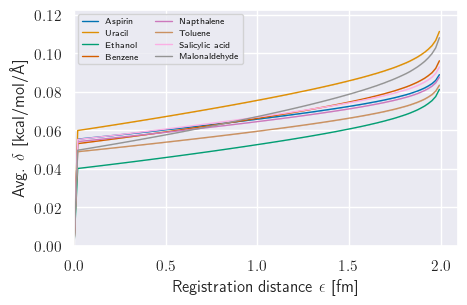

In [46]:
res = results.loc[results['std'] == 0.00001]
plot_dict_00001 = prepare_plot_dict(res)

sns.set_theme()
plot_results_dict(plot_dict_00001, 'Registration distance $\epsilon$ [fm]', 'Avg. $\delta$ [kcal/mol/Å] ', legend_params={'ncols': 2, 'fontsize': 6}, clip_on=True, zorder=None, budget_scaling=10**5,
                    keys=['Aspirin', 'Uracil', 'Ethanol', 'Benzene', 'Napthalene', 'Toluene', 'Salicylic acid', 'Malonaldehyde'])

In [47]:
res

,dataset,seed,target,std,delta,raw_results_file,average_error,n_abstains,max_rad,budgets,average_certified_output_distances
0,MD17,0,aspirin,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.860974,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05527246, 0.05529152, 0.055311713, 0.0..."
1,MD17,0,uracil,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.766526,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.059406407, 0.059434995, 0.05946425, 0...."
2,MD17,0,ethanol,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.567988,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.039847735, 0.03987028, 0.039893124, 0...."
3,MD17,0,benzene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.524226,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.052789457, 0.052814003, 0.05283935, 0...."
4,MD17,0,napthalene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.586232,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05378108, 0.053800784, 0.053820558, 0...."
5,MD17,0,toluene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.647464,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.04859737, 0.048617262, 0.048637066, 0...."
6,MD17,0,salicylic acid,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.026277,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05503372, 0.055055324, 0.055077307, 0...."
7,MD17,0,malonaldehyde,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.897565,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.049266983, 0.049297705, 0.049329814, 0..."
8,MD17,1,aspirin,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.874985,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05504574, 0.05506528, 0.055084754, 0.0..."
9,MD17,1,uracil,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.768908,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05942393, 0.059453227, 0.05948207, 0.0..."


In [48]:
list(plot_dict_00001.keys())

['Aspirin',
 'Uracil',
 'Ethanol',
 'Benzene',
 'Napthalene',
 'Toluene',
 'Salicylic acid',
 'Malonaldehyde']